# Import Data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from wordcloud import WordCloud
pd.options.display.max_columns = 30

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
%cd /content/drive/MyDrive/Data Analysis/1-Movies Dataset/

/content/drive/MyDrive/Data Analysis/1-Movies Dataset


In [148]:
df = pd.read_csv("movies_complete.csv", parse_dates = ["release_date"])

In [149]:
df.head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


# EDA

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44704 entries, 0 to 44703
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44704 non-null  int64         
 1   title                  44704 non-null  object        
 2   tagline                20290 non-null  object        
 3   release_date           44670 non-null  datetime64[ns]
 4   genres                 42599 non-null  object        
 5   belongs_to_collection  4465 non-null   object        
 6   original_language      44694 non-null  object        
 7   budget_musd            8863 non-null   float64       
 8   revenue_musd           7392 non-null   float64       
 9   production_companies   33367 non-null  object        
 10  production_countries   38848 non-null  object        
 11  vote_count             44704 non-null  float64       
 12  vote_average           42089 non-null  float64       
 13  p

Features:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [151]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44704.000000,8863.000000,7392.000000,44704.000000,42089.000000,44704.000000,43192.000000,44704.000000,44704.000000
mean,107170.236220,21.662224,68.926851,111.639272,6.003345,2.957759,97.567837,12.478414,10.315699
std,111796.626251,34.346104,146.547556,495.252693,1.280937,6.039389,34.650886,12.123431,15.892995
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26026.500000,2.000000,2.405036,3.000000,5.300000,0.402149,86.000000,6.000000,2.000000
50%,59109.000000,8.200000,16.883674,10.000000,6.100000,1.150552,95.000000,10.000000,6.000000
75%,154192.750000,25.000000,67.634600,35.000000,6.800000,3.770196,107.000000,15.000000,12.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000


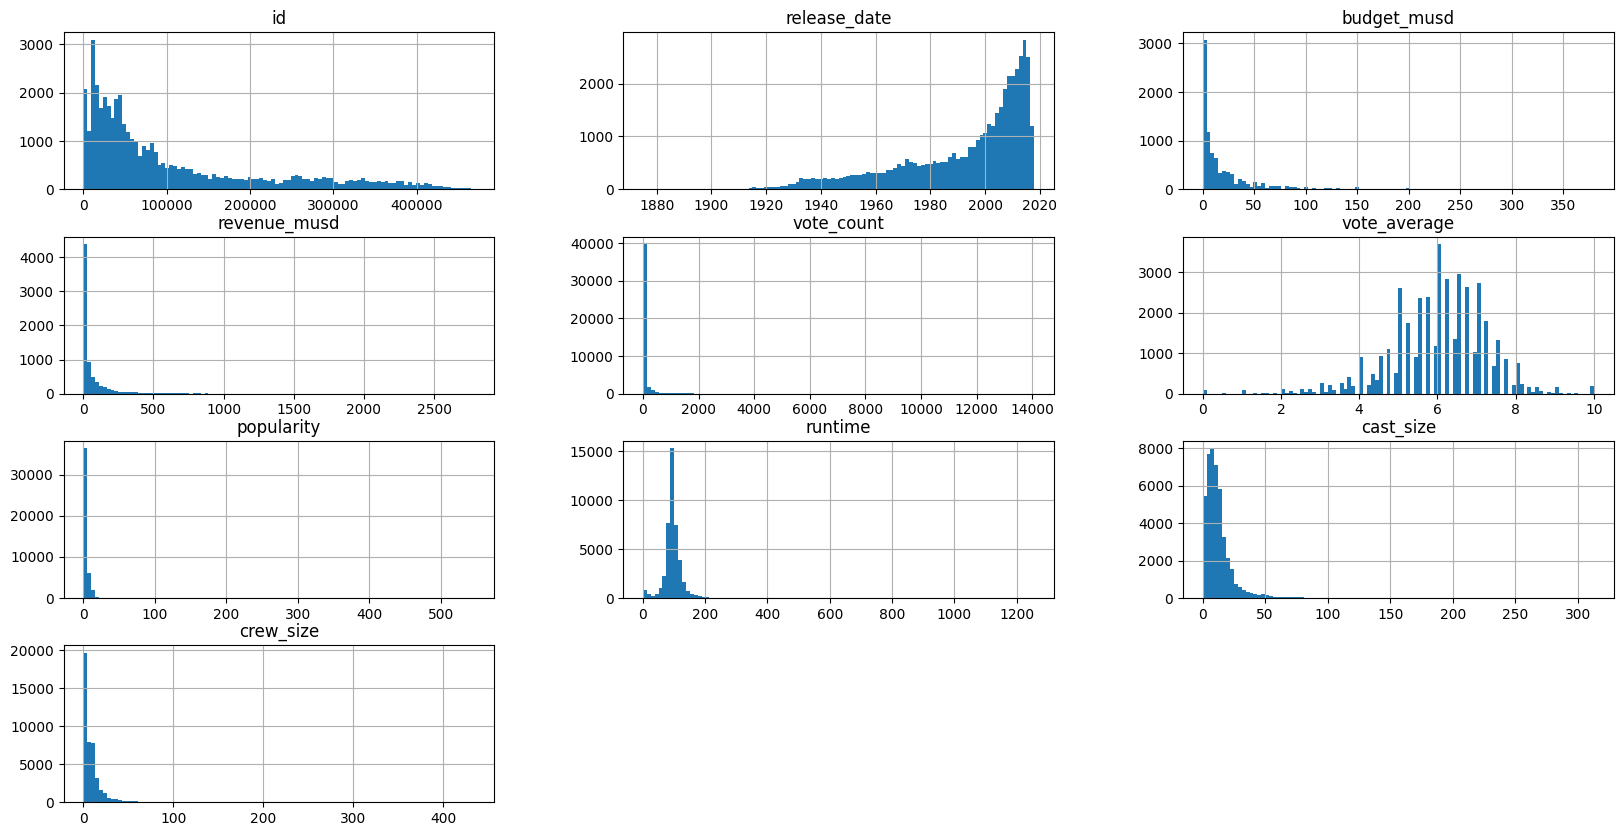

In [152]:
# plot histogram for all columns
df.hist(figsize=(20, 10), bins=100)
plt.show()

In [153]:
# check value counts for subset of columns
columns = ["budget_musd", "revenue_musd", "vote_count", "vote_average"]

for col in columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts(dropna = False).head(20))
    print("=" * 30)

Value counts for column 'budget_musd':
NaN     35841
5.0       286
10.0      259
20.0      243
2.0       241
15.0      226
3.0       220
25.0      206
1.0       195
30.0      190
4.0       180
6.0       173
12.0      171
40.0      167
8.0       155
35.0      141
0.5       141
7.0       137
50.0      124
1.5       119
Name: budget_musd, dtype: int64
Value counts for column 'revenue_musd':
NaN          37312
12.000000       20
11.000000       19
10.000000       19
2.000000        18
6.000000        17
5.000000        14
0.500000        13
8.000000        13
14.000000       12
0.000001        12
7.000000        11
1.000000        10
3.000000        10
20.000000       10
4.000000         9
0.000003         9
1.500000         9
15.000000        8
30.000000        8
Name: revenue_musd, dtype: int64
Value counts for column 'vote_count':
1.0     3186
2.0     3056
3.0     2730
0.0     2615
4.0     2442
5.0     2066
6.0     1724
7.0     1555
8.0     1333
9.0     1179
10.0    1156
11.0     933
12

In [154]:
# summary statistics on non-numerical columns
df.describe(include = 'O')
# count is 4404 & 41605 unique only that means we have duplicates
# 11 duplicated movies with title 'Cindrella'

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44704,20290,42599,4465,44694,33367,38848,43753,41107,44480,42515,43973
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44442,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//5D7U...,Georges Méliès,John Ford
freq,11,7,4938,29,31763,741,17729,3,22196,5,24,66


In [155]:
# check duplicates of 'Cinderella' movie if they are real or not
df[df["title"] == 'Cinderella']
# they are not real duplicates because they have different release dates with same titles

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.0,6.8,14.436858,74.0,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//cdf4...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12989,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.0,6.1,2.102013,88.0,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//s5d5...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23260,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.0,5.4,0.361288,52.0,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//2cLf...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23271,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.0,6.0,2.154873,48.0,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28081,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.0,5.3,0.987462,180.0,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//yKLF...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28348,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.0,6.7,19.801128,105.0,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//o1F2...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33816,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.0,4.8,0.486073,80.0,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//nLRn...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35125,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.0,5.9,0.209552,77.0,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//4Tjz...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35127,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.0,5.6,1.085134,90.0,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//fstw...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40450,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.0,5.5,1.301063,5.0,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//vtYk...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


**Creating best movies in terms of budget, revenue, vote**

In [156]:
# creating a copy named best movies
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//16XO...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//e64s...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...,...
44699,<img src='http://image.tmdb.org/t/p/w185//jlds...,Subdue,NaN,NaN,1.0,4.0,0.072051
44700,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.0,9.0,0.178241
44701,<img src='http://image.tmdb.org/t/p/w185//d5bX...,Betrayal,NaN,NaN,6.0,3.8,0.903007
44702,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503


In [157]:
# creating profit & return on investment columns
df_best["profit_musd"] = df["revenue_musd"] - df["budget_musd"]
df_best["return"] = df["revenue_musd"] / df["budget_musd"]

In [158]:
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//16XO...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//e64s...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [159]:
# rename columns for data representation
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]

In [160]:
# setting title to be the index
df_best.set_index("Title", inplace = True)

In [161]:
df_best.head(10)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//rhIR...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vzmL...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//6ksm...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//16XO...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//e64s...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
Heat,<img src='http://image.tmdb.org/t/p/w185//zMyf...,60.0,187.436818,1886.0,7.7,17.924927,127.436818,3.123947
Sabrina,<img src='http://image.tmdb.org/t/p/w185//jQh1...,58.0,NaN,141.0,6.2,6.677277,NaN,NaN
Tom and Huck,<img src='http://image.tmdb.org/t/p/w185//sGO5...,NaN,NaN,45.0,5.4,2.561161,NaN,NaN
Sudden Death,<img src='http://image.tmdb.org/t/p/w185//eoWv...,35.0,64.350171,174.0,5.5,5.231580,29.350171,1.838576


# Find Best & Worst Movies

In [162]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44704 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44480 non-null  object 
 1   Budget          8863 non-null   float64
 2   Revenue         7392 non-null   float64
 3   Votes           44704 non-null  float64
 4   Average Rating  42089 non-null  float64
 5   Popularity      44704 non-null  float64
 6   Profit          5377 non-null   float64
 7   ROI             5377 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [163]:
# filling nan with zeros
df_best["Budget"].fillna(0, inplace = True)
df_best["Votes"].fillna(0, inplace = True)

When comparing top movies by revenue, budget and ratings, we set constraints: a minimum number of votes to ensure reliable ratings and a minimum budget to prevent overestimating returns for low-budget films

In [164]:
# creating function to find best/worst movies by setting a value to min_votes & min_budget
def best_worst(n, by, ascending = False, min_budget = 0, min_votes = 0):
  df2 = df_best.loc[(df_best["Budget"] >=  min_budget) & (df_best["Votes"] >= min_votes),["",by]].sort_values(by = by, ascending = ascending).head(n)
  return HTML(df2.to_html(escape = False)) # it will look nicer to have image instead of html in dataframe

**Movies Top 5 - Highest Budget**

In [165]:
best_worst(n = 5, by = "Budget") # with budget constraint > 0 & min votes = 0

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Tangled,,260.0


**Movies Top 5 - Highest Revenue**

In [166]:
best_worst(n = 5, by = "Revenue") # with budget constraint > 0 & min votes = 0

,,Revenue
Title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


**Movies Top 5 - Highest Profit**

In [167]:
best_worst(5, "Profit") # with budget constraint > 0 & min votes = 0

,,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


**Movies Top 5 - Lowest Profit**

In [168]:
best_worst(5, "Profit", ascending = True) # with budget constraint > 0 & min votes = 0

,,Profit
Title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


**Movies Top 5 - Highest ROI**

In [169]:
best_worst(5, "ROI", min_budget = 50) # with budget constraint > 50 & min votes = 0

,,ROI
Title,,
Minions,,15.631499
Jurassic Park,,14.604762
The Twilight Saga: New Moon,,14.196549
Deadpool,,13.501948
Despicable Me 2,,12.773183


**Movies Top 5 - Lowest ROI**

In [170]:
best_worst(5, "ROI", min_budget = 70, ascending = True) # with budget constraint > 70 & min votes = 0

,,ROI
Title,,
Metropolis,,0.007022
The Adventures of Pluto Nash,,0.071040
Monkeybone,,0.072127
A Sound of Thunder,,0.074870
Cutthroat Island,,0.102218


**Movies Top 5 - Highest Rating**

In [171]:
best_worst(5, "Average Rating", min_votes = 100) # with budget constraint > 0 & min votes = 100

,,Average Rating
Title,,
Dilwale Dulhania Le Jayenge,,9.1
Planet Earth,,8.8
The Godfather,,8.5
Your Name.,,8.5
The Shawshank Redemption,,8.5


**Movies Top 5 - Most Votes**

In [172]:
best_worst(5, "Votes") # with budget constraint > 0 & min votes = 0

,,Votes
Title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


**Movies Top 5 - Lowest Rating**

In [173]:
best_worst(5, "Average Rating", min_votes = 100, ascending = True, min_budget = 50) # with budget constraint > 50 & min votes = 100

,,Average Rating
Title,,
Dragonball Evolution,,2.9
Gigli,,3.5
Son of the Mask,,3.6
Street Fighter: The Legend of Chun-Li,,3.9
Jack and Jill,,4.0


**Movies Top 5 - Most Popular**

In [174]:
best_worst(5, "Popularity") # with budget constraint > 0 & min votes = 0

,,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


# Find Your Favorite Next Movie

**Search 1 : Drama|Romance with Tom Hanks & high rating**

In [175]:
df['genres']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44699                Drama|Family
44700                       Drama
44701       Action|Drama|Thriller
44702                         NaN
44703                         NaN
Name: genres, Length: 44704, dtype: object

In [176]:
# Create mask genres
mask_genres = df["genres"].str.contains("Drama") & df["genres"].str.contains("Romance")
mask_genres.value_counts()

False    40263
True      4441
Name: genres, dtype: int64

In [177]:
# Create mask actor
mask_actor = df["cast"].str.contains("Tom Hanks")
mask_actor

0         True
1        False
2        False
3        False
4        False
         ...  
44699    False
44700    False
44701    False
44702    False
44703      NaN
Name: cast, Length: 44704, dtype: object

In [178]:
Tom_Hanks = df.loc[mask_actor & mask_genres,["poster_path","vote_average","title"]].sort_values(by = "vote_average", ascending = False)

In [179]:
# Tom Hanks movies with highest average vote
HTML(Tom_Hanks.to_html(escape = False))

,poster_path,vote_average,title
350,,8.2,Forrest Gump
2655,,6.9,Big
533,,6.5,Sleepless in Seattle
2282,,6.1,Nothing in Common
17157,,5.7,Larry Crowne


**Search 2: Movies with Uma Thurman, directed by Quentin Tarantino with low runtime**

In [182]:
mask_actor = df["cast"].str.contains("Uma Thurman")

In [183]:
mask_director = df["director"] == "Quentin Tarantino"

In [184]:
quentin = df.loc[mask_director & mask_actor,
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [185]:
HTML(quentin.to_html(escape = False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


**Search 3: Most Successful Pixar Studio Movies between 2010-2015 with high Revenue**

In [186]:
mask_time = df["release_date"].between("2010-01-01", "2015-12-31")

In [187]:
mask_studio = df["production_companies"].str.contains("Pixar").fillna(False)

In [188]:
pixar = df.loc[mask_studio & mask_time,
               ["title","revenue_musd", "poster_path", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [189]:
HTML(pixar.to_html(escape=False))

,revenue_musd,poster_path,release_date
title,,,
Toy Story 3,1066.969703,,2010-06-16
Inside Out,857.611174,,2015-06-09
Monsters University,743.559607,,2013-06-20
Cars 2,559.852396,,2011-06-11
Brave,538.983207,,2012-06-21
The Good Dinosaur,331.926147,,2015-11-14
Day & Night,NaN,,2010-06-17
The Blue Umbrella,NaN,,2013-02-12
Toy Story of Terror!,NaN,,2013-10-15


**Search 4: Action or Thriller Movie with original language English, min Rating of 7.5, min vote count of 50 & most recent**

In [190]:
mask_genres = df["genres"].str.contains("Action") | df["genres"].str.contains("Thriller")

In [191]:
mask_lan = df["original_language"] == "en"

In [192]:
mask_vote_av = df["vote_average"] >= 7.5

In [193]:
mask_vote_co = df["vote_count"] >= 50

In [194]:
movie = df.loc[mask_genres & mask_lan & mask_vote_av & mask_vote_co,
 ["title", "release_date", "poster_path", "vote_count", "vote_average"]].sort_values(by="release_date", ascending = False).set_index("title").head(10)

In [195]:
HTML(movie.to_html(escape = False))

,release_date,poster_path,vote_count,vote_average
title,,,,
Descendants 2,2017-07-21,,171.0,7.5
Dunkirk,2017-07-19,,2712.0,7.5
The Book of Henry,2017-06-16,,84.0,7.6
Guardians of the Galaxy Vol. 2,2017-04-19,,4858.0,7.6
Logan,2017-02-28,,6310.0,7.6
The Thinning,2016-10-12,,92.0,7.6
11.22.63,2016-02-15,,213.0,8.0
Star Wars: The Force Awakens,2015-12-15,,7993.0,7.5
Spotlight,2015-11-06,,2751.0,7.8


**Find Most Common Words in Titles & Taglines**

In [196]:
# drop nan values
title = df["title"].dropna()
tagline = df["tagline"].dropna()

In [197]:
# create corpus
title_corpus = ''.join(title)
tagline_corpus = ''.join(tagline)
tagline_corpus

'Roll the dice and unleash the excitement!Still Yelling. Still Fighting. Still Ready for Love.Friends are the people who let you be yourself... and never let you forget it.Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life!A Los Angeles Crime SagaYou are cordially invited to the most surprising merger of the year.The Original Bad Boys.Terror goes into overtime.No limits. No fears. No substitutes.Why can\'t the most powerful man in the world have the one thing he wants most?Part Dog. Part Wolf. All Hero.Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation.The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime!No one stays at the top forever.Lose your heart and come to your senses.Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life.New animals. New advent

(-0.5, 3999.5, 1999.5, -0.5)

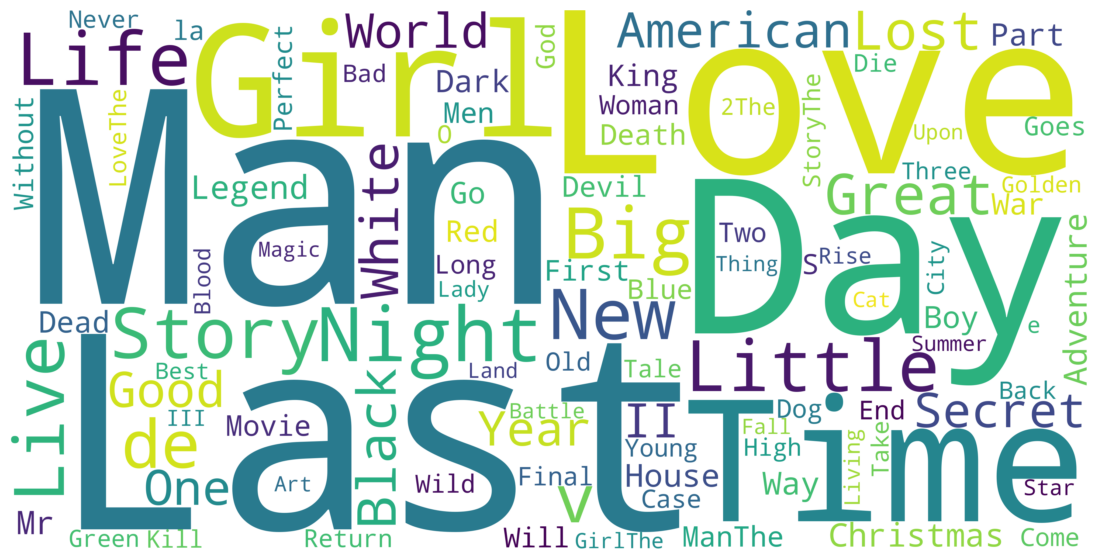

In [198]:
# title wordcloud
title_wordcloud = WordCloud(background_color = 'white', height = 2000, width = 4000, max_words = 100).generate(title_corpus)
plt.figure(figsize = (15,7))
plt.imshow(title_wordcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 3999.5, 1999.5, -0.5)

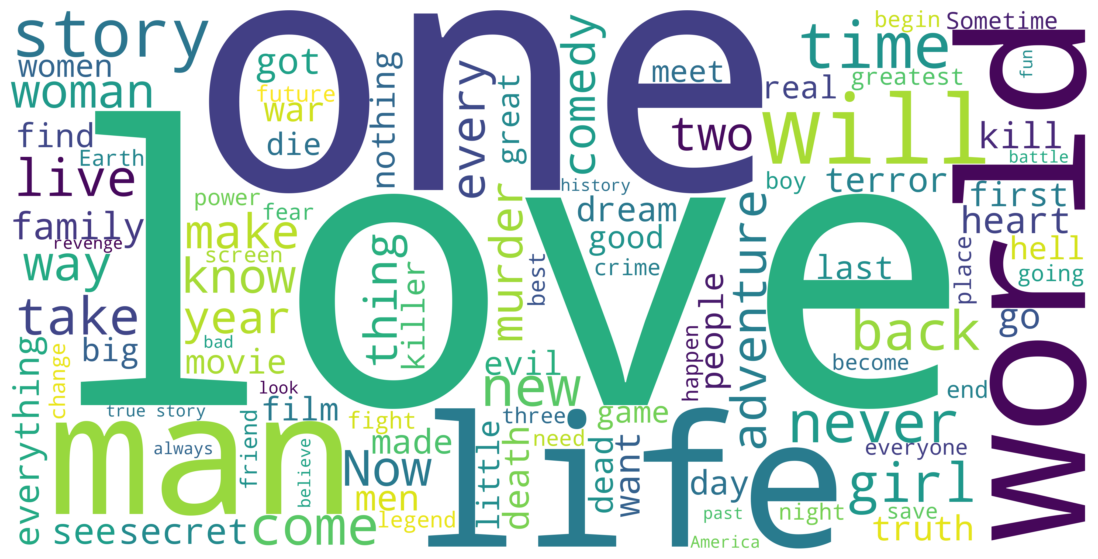

In [199]:
# tagline wordcloud
tagline_wordcloud = WordCloud(background_color = 'white', height=2000, width=4000, max_words= 100).generate(tagline_corpus)
plt.figure(figsize = (15,7))
plt.imshow(tagline_wordcloud, interpolation = "bilinear")
plt.axis("off")

# Are Franchises More Successful Compared To Non-Franchise Movies?

In [200]:
df["belongs_to_collection"].unique()

array(['Toy Story Collection', nan, 'Grumpy Old Men Collection', ...,
       'Ducobu Collection', 'Mister Blot Collection',
       'Red Lotus Collection'], dtype=object)

In [201]:
# create new franchise column
df["Franchise"] = df["belongs_to_collection"].notna()
df["Franchise"].value_counts()

False    40239
True      4465
Name: Franchise, dtype: int64

**Franchise vs. Stand-alone: Average Revenue**

In [202]:
df.groupby("Franchise").agg({"revenue_musd": "mean"}).reset_index()

,Franchise,revenue_musd
0,False,44.718056
1,True,165.549528


**Franchise vs. Stand-alone: Return on Investment**

In [203]:
df["ROI"] = df["revenue_musd"] / df["budget_musd"]

In [204]:
# median because data is not balanced
df.groupby("Franchise").agg({"ROI": "median"}).reset_index()

,Franchise,ROI
0,False,1.618196
1,True,3.711922


**Franchise vs. Stand-alone: Average budget**

In [205]:
df.groupby("Franchise").agg({"budget_musd": "mean"}).reset_index()

,Franchise,budget_musd
0,False,18.043172
1,True,38.305747


**Franchise vs. Stand-alone: Popularity**

In [206]:
df.groupby("Franchise").agg({"popularity": "mean"}).reset_index()

,Franchise,popularity
0,False,2.592992
1,True,6.245067


**Franchise vs. Stand-alone: Average Rating**

In [207]:
df.groupby("Franchise").agg({"vote_average": "mean"}).reset_index()

,Franchise,vote_average
0,False,6.008798
1,True,5.956757


In [208]:
# dataframe for all the metrics
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"}).reset_index()
# franchise movies has higher budget, revenue, popularity, vote counts and not big difference in average votes

,Franchise,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
0,False,18.043172,44.718056,6.008798,2.592992,1.618196,78.282487
1,True,38.305747,165.549528,5.956757,6.245067,3.711922,412.253751


# What Are The Most Successful Franchises

In [209]:
# create aggregated dataframe franchises
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"],
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median",
                                                      "vote_count":"mean"})
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00  13.008090   
00 Schneider Filmreihe                       NaN         6.50   1.931299   
08/15 Collection                             NaN         5.90   0.628127   
100 Girls Collection                         NaN         5.15   3.078651   
101 Dalmatians (Animated) Collection  215.880014         6.25  13.063212   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00   0.731334   
Чебурашка и крокодил Гена                    NaN         6.70   0.881504   
Что Творят мужчины! (Коллекция)              NaN         3.15   1.299605   
男はつらいよ シリーズ                                  NaN         7.00   0.038901   
식객 시리즈                                       NaN         4.95   0.157245   

                                            ROI   vote_count  
                                         median         mean  
belongs_to_collection                                         
... Has Fallen Collection              2.864804  2333.000000  
00 Schneider Filmreihe                      NaN    16.000000  
08/15 Collection                            NaN     4.000000  
100 Girls Collection                        NaN    64.000000  
101 Dalmatians (Animated) Collection  53.970003   937.000000  
...                                         ...          ...  
Сказки Чуковского                           NaN     3.000000  
Чебурашка и крокодил Гена                   NaN     7.000000  
Что Творят мужчины! (Коллекция)             NaN     5.500000  
男はつらいよ シリーズ                                 NaN     0.666667  
식객 시리즈                                      NaN     3.500000  

[1691 rows x 9 columns]

In [210]:
# top 5 franchises by movie count
franchises.nlargest(5, ("title", "count"))

title budget_musd            revenue_musd  \
                              count         sum       mean          sum   
belongs_to_collection                                                     
The Bowery Boys                  29        0.00        NaN     0.000000   
Totò Collection                  27        0.00        NaN     0.000000   
James Bond Collection            26     1539.65  59.217308  7106.970239   
Zatôichi: The Blind Swordsman    26        0.00        NaN     0.000000   
The Carry On Collection          25        0.00        NaN     0.000000   

                                          vote_average popularity       ROI  \
                                     mean         mean       mean    median   
belongs_to_collection                                                         
The Bowery Boys                       NaN     6.675000   0.198006       NaN   
Totò Collection                       NaN     6.837037   1.047324       NaN   
James Bond Collection          273.345009     6.338462  13.453502  6.128922   
Zatôichi: The Blind Swordsman         NaN     6.403846   1.100603       NaN   
The Carry On Collection               NaN     6.168000   3.220430       NaN   

                                vote_count  
                                      mean  
belongs_to_collection                       
The Bowery Boys                   0.724138  
Totò Collection                  18.037037  
James Bond Collection          1284.307692  
Zatôichi: The Blind Swordsman    11.192308  
The Carry On Collection          21.040000

In [211]:
# top 5 franchises by average budget
franchises.nlargest(5, ("budget_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Tangled Collection                      2       260.0  260.0   591.794936   
Pirates of the Caribbean Collection     5      1250.0  250.0  4521.576826   
The Avengers Collection                 2       500.0  250.0  2924.961604   
The Hobbit Collection                   3       750.0  250.0  2935.523356   
Man of Steel Collection                 2       475.0  237.5  1536.105712   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
Tangled Collection                    591.794936     7.250000  12.319364   
Pirates of the Caribbean Collection   904.315365     6.880000  53.972237   
The Avengers Collection              1462.480802     7.350000  63.633534   
The Hobbit Collection                 978.507785     7.233333  25.205614   
Man of Steel Collection               768.052856     6.100000  24.987357   

                                          ROI   vote_count  
                                       median         mean  
belongs_to_collection                                       
Tangled Collection                   2.276134  1901.000000  
Pirates of the Caribbean Collection  3.453009  5016.000000  
The Avengers Collection              5.963190  9454.000000  
The Hobbit Collection                3.833600  5981.333333  
Man of Steel Collection              3.219510  6825.500000

In [212]:
# top 5 franchises by average revenue
franchises.nlargest(5, ("revenue_musd", "mean"))

title budget_musd        revenue_musd               \
                        count         sum   mean          sum         mean   
belongs_to_collection                                                        
Avatar Collection           1       237.0  237.0  2787.965087  2787.965087   
The Avengers Collection     2       500.0  250.0  2924.961604  1462.480802   
Frozen Collection           2       150.0  150.0  1274.219009  1274.219009   
Finding Nemo Collection     2       294.0  147.0  1968.906425   984.453213   
The Hobbit Collection       3       750.0  250.0  2935.523356   978.507785   

                        vote_average  popularity        ROI    vote_count  
                                mean        mean     median          mean  
belongs_to_collection                                                      
Avatar Collection           7.200000  185.070892  11.763566  12114.000000  
The Avengers Collection     7.350000   63.633534   5.963190   9454.000000  
Frozen Collection           7.100000   16.878788   8.494793   3035.000000  
Finding Nemo Collection     7.200000   19.987735   7.573212   5312.500000  
The Hobbit Collection       7.233333   25.205614   3.833600   5981.333333

In [213]:
# top 5 franchises by median roi
franchises.nlargest(5, ("ROI", "median"))

title budget_musd         \
                                          count         sum   mean   
belongs_to_collection                                                
Blair Witch Collection                        3       5.060  2.530   
Super Size Me Collection                      1       0.065  0.065   
Open Water Collection                         2       1.330  0.665   
Bambi Collection                              2       0.858  0.858   
The Hills Have Eyes (Original) Collection     2       0.930  0.465   

                                          revenue_musd              \
                                                   sum        mean   
belongs_to_collection                                                
Blair Witch Collection                      293.172994  146.586497   
Super Size Me Collection                     28.575078   28.575078   
Open Water Collection                        54.667954   54.667954   
Bambi Collection                            267.447150  267.447150   
The Hills Have Eyes (Original) Collection    25.000000   25.000000   

                                          vote_average popularity  \
                                                  mean       mean   
belongs_to_collection                                               
Blair Witch Collection                        5.166667  10.510581   
Super Size Me Collection                      6.600000   5.266103   
Open Water Collection                         5.250000  11.076564   
Bambi Collection                              6.400000  10.744486   
The Hills Have Eyes (Original) Collection     5.200000   3.941166   

                                                   ROI vote_count  
                                                median       mean  
belongs_to_collection                                              
Blair Witch Collection                     2071.183966      632.0  
Super Size Me Collection                    439.616585      520.0  
Open Water Collection                       420.522723      238.5  
Bambi Collection                            311.709965      824.5  
The Hills Have Eyes (Original) Collection   108.695652       89.0

In [214]:
# top 10 franchises by average vote & vote count >= 20000
franchises[franchises[("vote_count", "mean")] >= 2000].nlargest(10, ("vote_average", "mean"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3       266.0   88.666667   
The Godfather Collection                3        73.0   24.333333   
Blade Runner Collection                 1        28.0   28.000000   
The Dark Knight Collection              3       585.0  195.000000   
Guardians of the Galaxy Collection      2       370.0  185.000000   
Kill Bill Collection                    2        60.0   30.000000   
Kingsman Collection                     1        81.0   81.000000   
How to Train Your Dragon Collection     2       310.0  155.000000   
Harry Potter Collection                 8      1280.0  160.000000   
Toy Story Collection                    3       320.0  106.666667   

                                    revenue_musd             vote_average  \
                                             sum        mean         mean   
belongs_to_collection                                                       
The Lord of the Rings Collection     2916.544743  972.181581     8.033333   
The Godfather Collection              429.375314  143.125105     7.966667   
Blade Runner Collection                33.139618   33.139618     7.900000   
The Dark Knight Collection           2463.716216  821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770  818.372385     7.750000   
Kill Bill Collection                  333.108461  166.554231     7.700000   
Kingsman Collection                   414.351546  414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807  552.000904     7.550000   
Harry Potter Collection              7707.367425  963.420928     7.537500   
Toy Story Collection                 1937.890605  645.963535     7.533333   

                                     popularity        ROI   vote_count  
                                           mean     median         mean  
belongs_to_collection                                                    
The Lord of the Rings Collection      30.272873  11.725157  8253.000000  
The Godfather Collection              31.641307   3.657142  3677.000000  
Blade Runner Collection               96.272374   1.183558  3833.000000  
The Dark Knight Collection            57.418393   4.339756  9681.000000  
Guardians of the Galaxy Collection   119.311296   4.433036  7436.000000  
Kill Bill Collection                  23.397469   5.551808  4576.000000  
Kingsman Collection                   28.224212   5.115451  6069.000000  
How to Train Your Dragon Collection   13.336685   3.600057  3741.000000  
Harry Potter Collection               26.253893   6.165086  5983.250000  
Toy Story Collection                  18.820369   5.526299  4679.666667

# Who Are The Most Successful Directors

In [215]:
active_directors  = df["director"].value_counts().head(10)

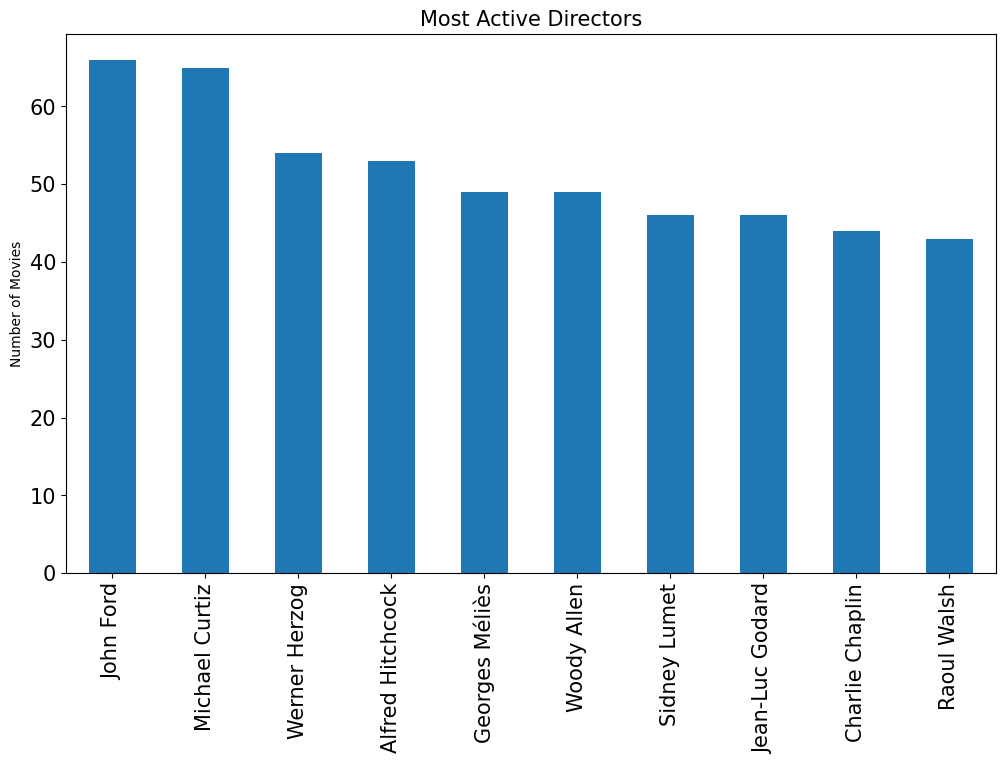

In [216]:
plt.figure(figsize=(12,7))
active_directors.plot(kind = 'bar', fontsize = 15)
plt.title("Most Active Directors", fontsize = 15)
plt.ylabel("Number of Movies", fontsize = 10)
plt.show()

In [217]:
top_directors_revenue = df.groupby("director").agg({"revenue_musd":"sum"}).nlargest(10, "revenue_musd")

<Figure size 1200x700 with 0 Axes>

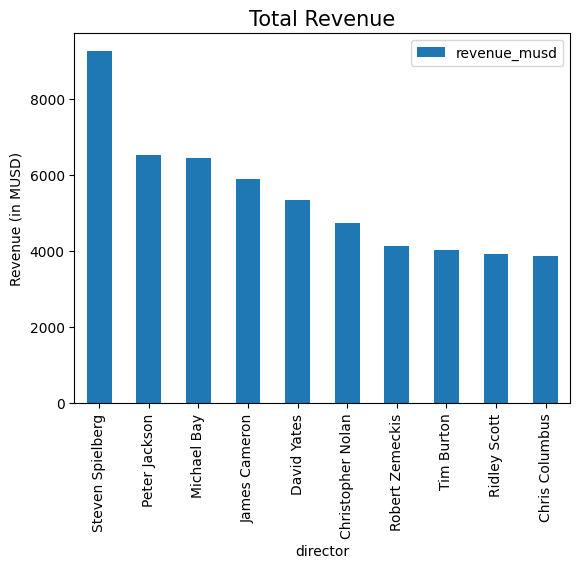

In [218]:
plt.figure(figsize=(12,7))
top_directors_revenue.plot(kind = 'bar')
plt.title("Total Revenue", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 10)
plt.show()

In [219]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [220]:
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.0,4.0
Davide Manuli,1,6.9,10.0
E.W. Swackhamer,1,5.9,5.0
Vitaliy Vorobyov,1,5.5,3.0
Yeon Sang-Ho,4,6.6,1039.0
...,...,...,...
Ярополк Лапшин,1,10.0,1.0
پیمان معادی,1,6.0,2.0
塩谷 直義,1,7.2,40.0


In [221]:
directors[(directors["vote_count"] >= 1000) & (directors["vote_average"] >= 6)].nlargest(10, "vote_average")

,title,vote_average,vote_count
director,,,
Garth Davis,1,8.000000,1699.0
Tony Kaye,3,7.866667,3474.0
Hayao Miyazaki,14,7.700000,14700.0
Stephen Chbosky,1,7.700000,3056.0
Sergio Leone,7,7.657143,6737.0
Jan Pinkava,2,7.650000,4819.0
Christopher Nolan,11,7.618182,67344.0
Alex Garland,1,7.600000,4862.0
Dan Gilroy,1,7.600000,3475.0


In [222]:
df["genres"] = df["genres"].astype(str)
df["genres"]

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44699                Drama|Family
44700                       Drama
44701       Action|Drama|Thriller
44702                         nan
44703                         nan
Name: genres, Length: 44704, dtype: object

In [223]:
mask_genres = df["genres"].str.contains("Horror")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44699    False
44700    False
44701    False
44702    False
44703    False
Name: genres, Length: 44704, dtype: bool

In [224]:
# select top 10 successful horror directors
df.loc[mask_genres].groupby("director").agg({"revenue_musd":"sum"}).nlargest(10, "revenue_musd")

,revenue_musd
director,
Paul W.S. Anderson,982.288069
James Wan,861.308375
Wes Craven,834.932742
Francis Lawrence,816.233738
Ridley Scott,689.004312
Marc Forster,531.865000
Steven Spielberg,500.104919
William Friedkin,466.403172
Darren Lynn Bousman,456.342667


# Who Are The Most Successful Actors

In [225]:
df["cast"].str.split("|")

0        [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1        [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2        [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3        [Whitney Houston, Angela Bassett, Loretta Devi...
4        [Steve Martin, Diane Keaton, Martin Short, Kim...
                               ...                        
44699          [Leila Hatami, Kourosh Tahami, Elham Korda]
44700    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
44701    [Erika Eleniak, Adam Baldwin, Julie du Page, J...
44702    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
44703                                                  NaN
Name: cast, Length: 44704, dtype: object

In [226]:
actor_df = df["cast"].str.split("|", expand = True)
actor_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44699,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44700,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44701,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44702,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,Aleksandr Chabrov,Vera Orlova,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [227]:
actor_df.stack()

0      0            Tom Hanks
       1            Tim Allen
       2          Don Rickles
       3           Jim Varney
       4        Wallace Shawn
                  ...        
44702  0     Iwan Mosschuchin
       1    Nathalie Lissenko
       2         Pavel Pavlov
       3    Aleksandr Chabrov
       4          Vera Orlova
Length: 557835, dtype: object

In [228]:
actor_df.stack().reset_index(level =1, drop = True)

0                Tom Hanks
0                Tim Allen
0              Don Rickles
0               Jim Varney
0            Wallace Shawn
               ...        
44702     Iwan Mosschuchin
44702    Nathalie Lissenko
44702         Pavel Pavlov
44702    Aleksandr Chabrov
44702          Vera Orlova
Length: 557835, dtype: object

In [229]:
actor_df = actor_df.stack().reset_index(level = 1, drop = True).to_frame()

In [230]:
actor_df

,0
0,Tom Hanks
0,Tim Allen
0,Don Rickles
0,Jim Varney
0,Wallace Shawn
...,...
44702,Iwan Mosschuchin
44702,Nathalie Lissenko
44702,Pavel Pavlov
44702,Aleksandr Chabrov


In [231]:
# rename column from 0 to actor
actor_df.columns = ["actor"]
actor_df

,actor
0,Tom Hanks
0,Tim Allen
0,Don Rickles
0,Jim Varney
0,Wallace Shawn
...,...
44702,Iwan Mosschuchin
44702,Nathalie Lissenko
44702,Pavel Pavlov
44702,Aleksandr Chabrov


In [232]:
actor_df = actor_df.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [233]:
actor_df

,actor,title,revenue_musd,vote_average,popularity
0,Tom Hanks,Toy Story,373.554033,7.7,21.946943
0,Tim Allen,Toy Story,373.554033,7.7,21.946943
0,Don Rickles,Toy Story,373.554033,7.7,21.946943
0,Jim Varney,Toy Story,373.554033,7.7,21.946943
0,Wallace Shawn,Toy Story,373.554033,7.7,21.946943
...,...,...,...,...,...
44702,Iwan Mosschuchin,Satan Triumphant,NaN,NaN,0.003503
44702,Nathalie Lissenko,Satan Triumphant,NaN,NaN,0.003503
44702,Pavel Pavlov,Satan Triumphant,NaN,NaN,0.003503
44702,Aleksandr Chabrov,Satan Triumphant,NaN,NaN,0.003503


In [234]:
actor_df["actor"].value_counts().head(10)

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Gérard Depardieu     109
John Carradine       109
Donald Sutherland    108
Jackie Chan          108
Frank Welker         107
Name: actor, dtype: int64

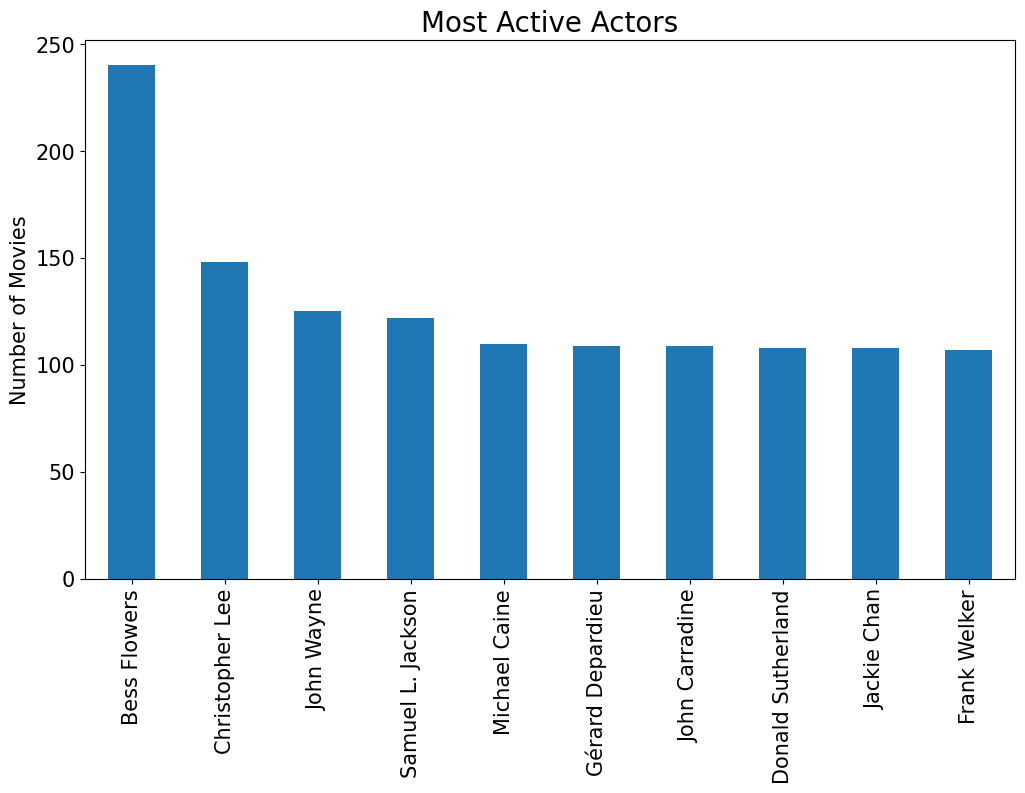

In [235]:
plt.figure(figsize = (12,7))
actor_df["actor"].value_counts().head(10).plot(kind = 'bar', fontsize = 15)
plt.title("Most Active Actors", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [236]:
agg = actor_df.groupby("actor").agg(Total_Revenue = ("revenue_musd", "sum"),
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"),
                               Mean_Pop = ("popularity", "mean"),
                               Total_Movies = ("actor", "count"))

In [237]:
# top 10 actors with by number of movies
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Bess Flowers,368.913259,14.756530,6.184186,2.030528,240
Christopher Lee,9417.047887,324.725789,5.910204,4.749606,148
John Wayne,236.094000,11.242571,5.712097,3.092939,125
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Michael Caine,8053.404838,191.747734,6.269444,8.265272,110
Gérard Depardieu,1247.608953,95.969919,6.053211,3.703836,109
John Carradine,255.839586,19.679968,5.546667,2.434950,109
Donald Sutherland,5390.766679,138.224787,6.233962,7.003230,108
Jackie Chan,4699.185933,146.849560,6.275701,5.862638,108


In [238]:
# top 10 actors with by total revenue
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Stan Lee,19414.957555,647.165252,6.513043,29.936175,48
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Warwick Davis,13256.032188,662.801609,6.294118,13.088614,34
Frank Welker,13044.152470,326.103812,6.310377,9.571404,107
John Ratzenberger,12596.126073,449.861645,6.484444,10.959477,46
Jess Harnell,12234.608163,611.730408,6.435294,10.919015,35
Hugo Weaving,11027.578473,459.482436,6.473684,10.967890,40
Ian McKellen,11015.592318,478.938796,6.353488,15.447180,44
Johnny Depp,10653.760641,217.423687,6.440580,12.378196,69


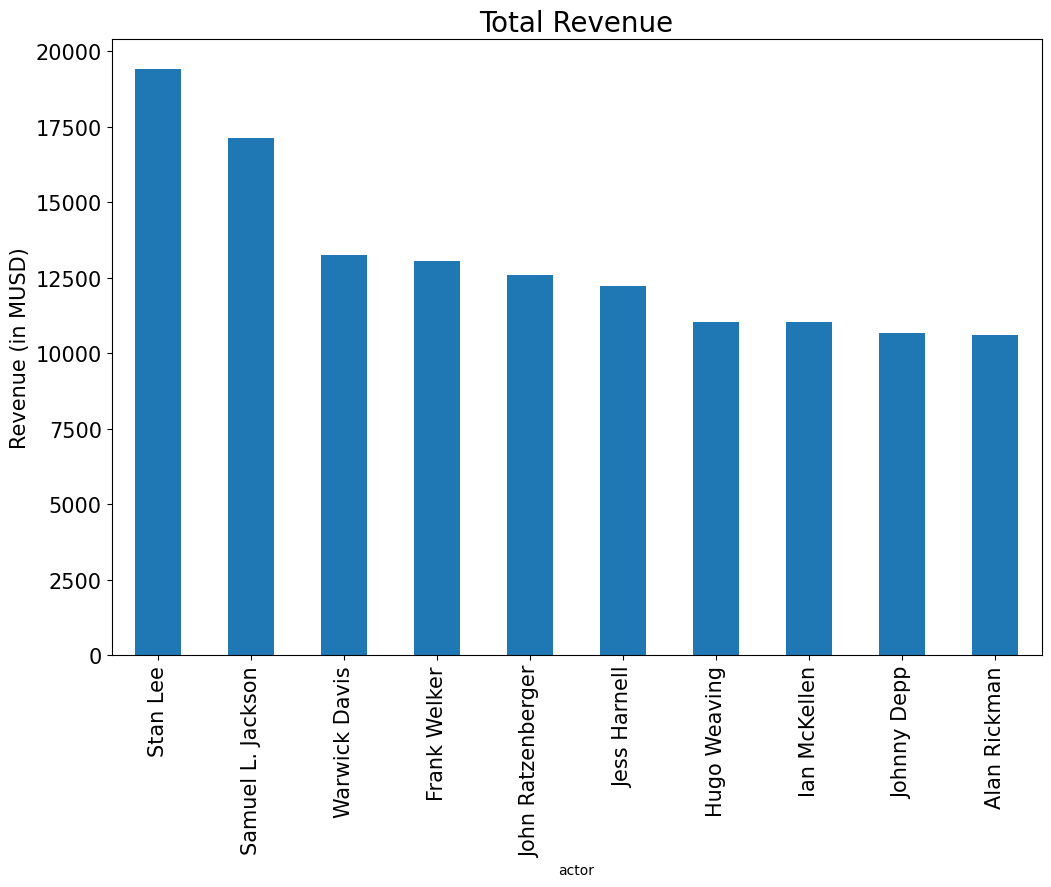

In [239]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue", fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [240]:
agg["Mean_Revenue"].nlargest(10)

actor
April Marie Thomas    2787.965087
Ashley Jeffery        2787.965087
Austin Wilson         2787.965087
Brandon Jelkes        2787.965087
Bravita A. Threatt    2787.965087
Carvon Futrell        2787.965087
Chris Mala            2787.965087
Christa Oliver        2787.965087
Christopher Nolen     2787.965087
Colin Bleasdale       2787.965087
Name: Mean_Revenue, dtype: float64

In [241]:
# we are not sure if the actor is the main actor or just a supporter
actor_df[actor_df["actor"] == "April Marie Thomas"]

,actor,title,revenue_musd,vote_average,popularity
14449,April Marie Thomas,Avatar,2787.965087,7.2,185.070892


In [242]:
# so we will filter actors who acted more than 15 movies and check mean revenue
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Gloria Stuart,1845.034188,1845.034188,6.368750,3.477432,18
Keith Richards,2967.713802,989.237934,6.463636,5.032988,23
Yuri Lowenthal,1708.162716,854.081358,6.188235,19.884649,17
Alex Zahara,769.653595,769.653595,5.958824,5.087243,17
Mark Williams,6872.086729,763.565192,6.755556,12.361081,18


In [243]:
# filter actors who acted more than 15 movies and check mean rating
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Rating")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Şener Şen,11.074013,3.691338,7.693333,0.912165,16
Daisuke Katô,0.423649,0.141216,7.611111,3.428240,19
Adile Naşit,0.912800,0.456400,7.530769,0.578235,15
Haruko Sugimura,0.000000,NaN,7.526316,2.155955,19
Nobuo Nakamura,0.055240,0.055240,7.470588,3.342640,17


In [244]:
# filter actors who acted more than 15 movies and check mean popularity
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Jon Hamm,3449.345393,191.630300,6.328000,39.417351,25
Ava Acres,6272.358330,482.489102,5.985714,36.260864,21
Emma Watson,9639.203121,535.511284,6.768421,35.965301,19
Stan Lee,19414.957555,647.165252,6.513043,29.936175,48
Luke Evans,8033.097356,502.068585,6.300000,29.832249,18


#What are the most successful/popular genres? Has this changed over time (e.g. 80ths vs. 90ths)?




In [245]:
genres = df['genres'].str.split("|" , expand = True)

In [246]:
genre = genres.stack().reset_index(level =1 ,drop = True).to_frame()
genre.columns = ["genre"]
genre

,genre
0,Animation
0,Comedy
0,Family
1,Adventure
1,Fantasy
...,...
44701,Action
44701,Drama
44701,Thriller
44702,nan


In [247]:
gen = genre.merge(df[["title",  "revenue_musd", "vote_average", "popularity"]], how = "left", left_index = True, right_index = True)
gen

,genre,title,revenue_musd,vote_average,popularity
0,Animation,Toy Story,373.554033,7.7,21.946943
0,Comedy,Toy Story,373.554033,7.7,21.946943
0,Family,Toy Story,373.554033,7.7,21.946943
1,Adventure,Jumanji,262.797249,6.9,17.015539
1,Fantasy,Jumanji,262.797249,6.9,17.015539
...,...,...,...,...,...
44701,Action,Betrayal,NaN,3.8,0.903007
44701,Drama,Betrayal,NaN,3.8,0.903007
44701,Thriller,Betrayal,NaN,3.8,0.903007
44702,nan,Satan Triumphant,NaN,NaN,0.003503


In [248]:
# top 5 genres by average vote
gen.groupby("genre").agg({"vote_average":"mean"}).nlargest(5, "vote_average")

,vote_average
genre,
Documentary,6.657042
Animation,6.447507
History,6.412481
Music,6.330868
War,6.285579


In [249]:
# top 5 genres by average revenue
gen.groupby("genre").agg({"revenue_musd":"mean"}).nlargest(5, "revenue_musd")

,revenue_musd
genre,
Adventure,178.677985
Animation,176.316987
Fantasy,165.631508
Family,158.597643
Science Fiction,131.253053


<Figure size 1200x700 with 0 Axes>

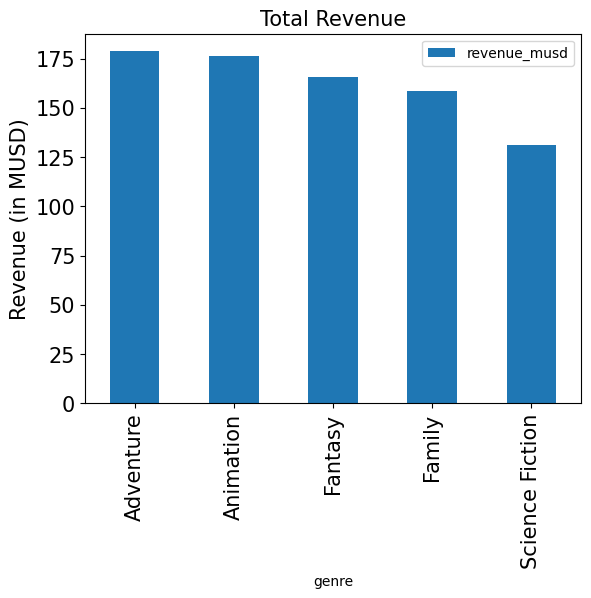

In [250]:
plt.figure(figsize = (12,7))
gen.groupby("genre").agg({"revenue_musd":"mean"}).nlargest(5, "revenue_musd").plot(kind = 'bar', fontsize=15)
plt.title("Total Revenue", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [251]:
# top 5 genres by average popularity
gen.groupby("genre").agg({"popularity":"mean"}).nlargest(5, "popularity")

,popularity
genre,
Adventure,6.003705
Fantasy,5.361847
Science Fiction,4.999640
Action,4.783736
Family,4.766994
